In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import csv, skip lines with error
data = pd.read_csv("finantier_data_technical_test_dataset.csv", error_bad_lines=False, header=None)

b'Skipping line 2: expected 21 fields, saw 22\nSkipping line 4: expected 21 fields, saw 22\nSkipping line 29: expected 21 fields, saw 22\nSkipping line 85: expected 21 fields, saw 22\n'


In [4]:
# drop empty rows
data.dropna(how='all', inplace=True)

In [5]:
# make first row header
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header 

# Source: https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row

In [62]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7041,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7042,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7043,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


In [6]:
# change relevant columns to categorical and int data types
data = data.astype({
    'gender':'category',
    'SeniorCitizen':'category',
    'Partner':'category',
    'Dependents':'category',
    'tenure':'int64',
    'PhoneService':'category',
    'MultipleLines':'category',
    'InternetService':'category',
    'OnlineSecurity':'category',
    'OnlineBackup':'category',
    'DeviceProtection':'category',
    'TechSupport':'category',
    'StreamingTV':'category',
    'StreamingMovies':'category',
    'Contract':'category',
    'PaperlessBilling':'category',
    'PaymentMethod':'category',
    'Default':'category'
})

In the next 2 cells, we see that the only rows with no TotalCharge are also the only rows with 0 tenure. It is possible that these customers have only just started using the phone service, and their TotalCharge has yet to be calculated. 
As such, we will assume that they have a TotalCharge value of 0.0.

In [64]:
data[data['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
490,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
755,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
938,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1084,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1342,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3333,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3828,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20,,No
5220,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7,,No
6672,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [65]:
data[data['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
490,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
755,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
938,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1084,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1342,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3333,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3828,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20,,No
5220,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7,,No
6672,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# change charges columns to float, missing values in TotalCharges changed to 0.0
data.MonthlyCharges = data.MonthlyCharges.astype(float)
data.TotalCharges = data.TotalCharges.str.replace(' ', '0.0').astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7040 entries, 1 to 7044
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7040 non-null   object  
 1   gender            7040 non-null   category
 2   SeniorCitizen     7040 non-null   category
 3   Partner           7040 non-null   category
 4   Dependents        7040 non-null   category
 5   tenure            7040 non-null   int64   
 6   PhoneService      7040 non-null   category
 7   MultipleLines     7040 non-null   category
 8   InternetService   7040 non-null   category
 9   OnlineSecurity    7040 non-null   category
 10  OnlineBackup      7040 non-null   category
 11  DeviceProtection  7040 non-null   category
 12  TechSupport       7040 non-null   category
 13  StreamingTV       7040 non-null   category
 14  StreamingMovies   7040 non-null   category
 15  Contract          7040 non-null   category
 16  PaperlessBilling  7040 n

In [68]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7040.000000,7040.000000,7040.000000
mean,32.368892,64.762116,2279.715568
std,24.563890,30.096016,2267.256868
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.162500
50%,29.000000,70.350000,1392.925000
75%,55.000000,89.850000,3789.800000
max,72.000000,118.750000,8684.800000


# Data Visualisation and Feature Engineering
Performed on continuous variables of our dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x1f149de0cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f149dea3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f149de0970>],
 'medians': [<matplotlib.lines.Line2D at 0x1f149deaa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f149deadc0>],
 'means': []}

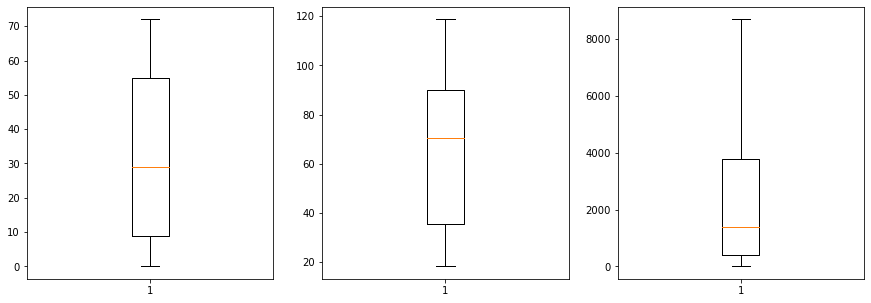

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[15,5])

axes[0].boxplot(data['tenure'])
axes[1].boxplot(data['MonthlyCharges'])
axes[2].boxplot(data['TotalCharges'])

<AxesSubplot:title={'center':'tenure'}, xlabel='Default'>

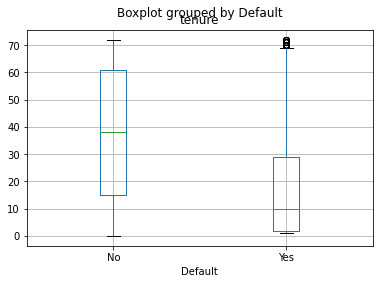

In [70]:
data.boxplot(column='tenure', by='Default')

<AxesSubplot:title={'center':'MonthlyCharges'}, xlabel='Default'>

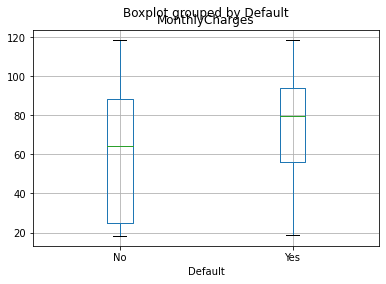

In [71]:
data.boxplot(column='MonthlyCharges', by='Default')

<AxesSubplot:title={'center':'TotalCharges'}, xlabel='Default'>

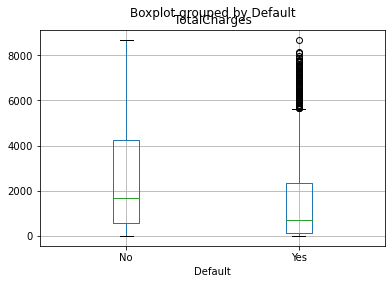

In [72]:
data.boxplot(column='TotalCharges', by='Default')

(array([1612.,  759.,  570.,  556.,  493.,  494.,  451.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

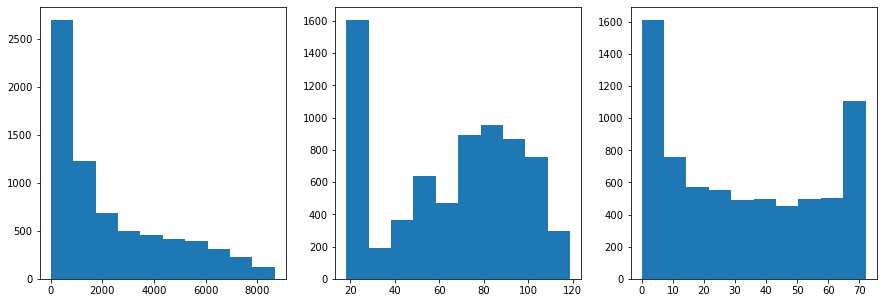

In [73]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[15,5])

axs[0].hist(data['TotalCharges'])
axs[1].hist(data['MonthlyCharges'])
axs[2].hist(data['tenure'])

(array([2701., 1227.,  683.,  502.,  460.,  414.,  396.,  311.,  224.,
         122.]),
 array([   0.  ,  868.48, 1736.96, 2605.44, 3473.92, 4342.4 , 5210.88,
        6079.36, 6947.84, 7816.32, 8684.8 ]),
 <BarContainer object of 10 artists>)

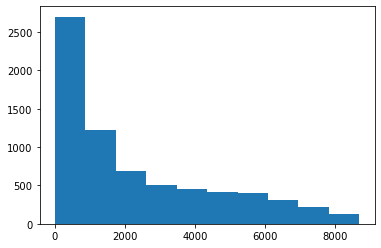

In [74]:
plt.hist(data['TotalCharges'])

TotalCharges is skewed to the right. I'm not exactly sure whether/to what extent skewness will impact predictive accuracy for a deep learning model, but to be safe I will try to do a log transformation. 
I used log(x+1) since there are 0 values in the column

In [9]:
data['log_TotalCharges'] = np.log(data['TotalCharges']+1)

array([[<AxesSubplot:title={'center':'log_TotalCharges'}>]], dtype=object)

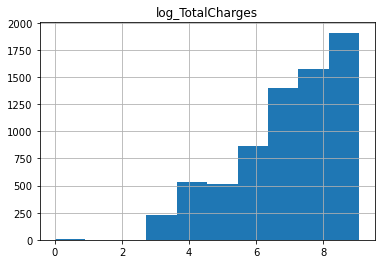

In [76]:
data.hist(column='log_TotalCharges')

Now the log transformed TotalCharges is skewed to the left, so we try square root instead

In [10]:
data['sqrt_TotalCharges'] = np.sqrt(data['TotalCharges'])

array([[<AxesSubplot:title={'center':'sqrt_TotalCharges'}>]], dtype=object)

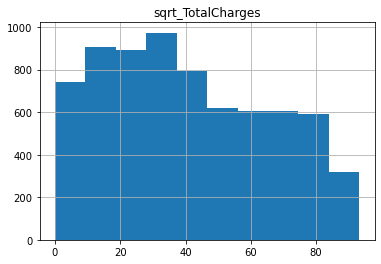

In [78]:
data.hist(column='sqrt_TotalCharges')

In [11]:
# Normalise continuous variables

data['norm_MonthlyCharges'] = (data['MonthlyCharges']-data['MonthlyCharges'].min())/(data['MonthlyCharges'].max()-data['MonthlyCharges'].min())
data['norm_tenure'] = (data['tenure']-data['tenure'].min())/(data['tenure'].max()-data['tenure'].min())
data['normsqrt_TotalCharges'] = (data['sqrt_TotalCharges']-data['sqrt_TotalCharges'].min())/(data['sqrt_TotalCharges'].max()-data['sqrt_TotalCharges'].min())

# Source: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

(array([1612.,  759.,  570.,  556.,  493.,  494.,  451.,  495.,  501.,
        1109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

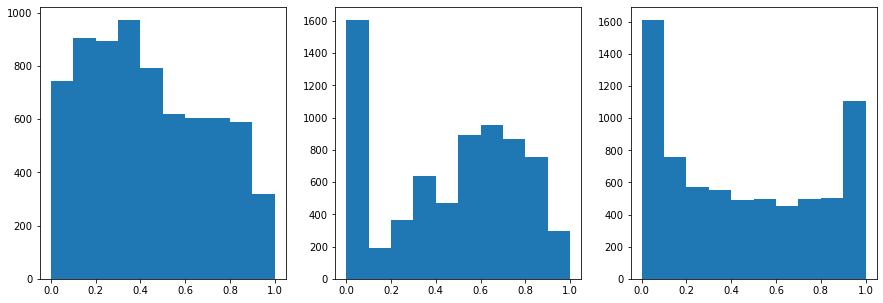

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[15,5])

axs[0].hist(data['normsqrt_TotalCharges'])
axs[1].hist(data['norm_MonthlyCharges'])
axs[2].hist(data['norm_tenure'])

## Binning
In the TabTransformer research paper, it was recommended that continuous variables should be turned into rescaled continuous variables and categorical variables. Doing so would not lead to overfitting, and could make a continuous variable more useful for the model.

Thus I chose to use binning to create categorical variables based on continuous variables. All 3 continuous variables have significantly more observations at the lower end of the scale, so fixed width binning could create very irregular bins. I chose to use quantiles to bin them instead.

In [12]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
quantile_list = [0, .25, .5, .75, 1.]

data['bin_TotalCharges'] = pd.qcut(
                                data['TotalCharges'], 
                                q=quantile_list,       
                                labels=quantile_labels)

data['bin_MonthlyCharges'] = pd.qcut(
                                data['MonthlyCharges'], 
                                q=quantile_list,       
                                labels=quantile_labels)

data['bin_tenure'] = pd.qcut(
                            data['tenure'], 
                            q=quantile_list,       
                            labels=quantile_labels)

# Source: https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b

In [13]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Default,log_TotalCharges,sqrt_TotalCharges,norm_MonthlyCharges,norm_tenure,normsqrt_TotalCharges,bin_TotalCharges,bin_MonthlyCharges,bin_tenure
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,3.429137,5.463515,0.115423,0.013889,0.058626,0-25Q,0-25Q,0-25Q
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,4.692723,10.399519,0.354229,0.027778,0.111592,0-25Q,25-50Q,0-25Q
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,No,7.518471,42.903963,0.239303,0.625000,0.460381,50-75Q,25-50Q,50-75Q
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,Yes,5.028148,12.314625,0.521891,0.027778,0.132142,0-25Q,50-75Q,0-25Q
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,820.50,Yes,6.711132,28.644371,0.809950,0.111111,0.307369,25-50Q,75-100Q,0-25Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,1990.50,No,7.596643,44.615020,0.662189,0.333333,0.478742,50-75Q,50-75Q,25-50Q
7041,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,7362.90,No,8.904345,85.807342,0.845274,1.000000,0.920756,75-100Q,75-100Q,75-100Q
7042,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,346.45,No,5.850621,18.613167,0.112935,0.152778,0.199729,0-25Q,0-25Q,25-50Q
7043,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,306.60,Yes,5.728800,17.509997,0.558706,0.055556,0.187891,0-25Q,50-75Q,0-25Q


# Preparing Input Dataframe



In [47]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Default,log_TotalCharges,sqrt_TotalCharges,norm_MonthlyCharges,norm_tenure,normsqrt_TotalCharges,bin_TotalCharges,bin_MonthlyCharges,bin_tenure
count,7040,7040,7040,7040,7040,7040.000000,7040,7040,7040,7040,...,7040.000000,7040,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040,7040,7040
unique,7040,2,2,2,2,NaN,2,3,3,3,...,NaN,2,NaN,NaN,NaN,NaN,NaN,4,4,4
top,9574-RKJIF,Male,0,No,No,NaN,Yes,No,Fiber optic,No,...,NaN,No,NaN,NaN,NaN,NaN,NaN,75-100Q,25-50Q,0-25Q
freq,1,3552,5899,3639,4931,NaN,6358,3387,3096,3498,...,NaN,5171,NaN,NaN,NaN,NaN,NaN,1760,1764,1854
mean,NaN,NaN,NaN,NaN,NaN,32.368892,NaN,NaN,NaN,NaN,...,2279.715568,NaN,6.932202,40.934117,0.462807,0.449568,0.439244,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,24.563890,NaN,NaN,NaN,NaN,...,2267.256868,NaN,1.569614,24.580469,0.299463,0.341165,0.263761,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,398.162500,NaN,5.989367,19.954003,0.171642,0.125000,0.214116,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,1392.925000,NaN,7.239879,37.321909,0.518408,0.402778,0.400483,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,3789.800000,NaN,8.240332,61.561351,0.712438,0.763889,0.660584,NaN,NaN,NaN


In [56]:
data['PaymentMethod'].describe()

count                 7040
unique                   4
top       Electronic check
freq                  2364
Name: PaymentMethod, dtype: object

In [14]:
inputdata = data.drop(columns=['customerID','tenure','MonthlyCharges','TotalCharges','log_TotalCharges','sqrt_TotalCharges'])

In [16]:
inputdata.gender.replace(('Female', 'Male'), (1, 0), inplace=True)
inputdata.Partner.replace(('Yes', 'No'), (1, 0), inplace=True)
inputdata.Dependents.replace(('Yes', 'No'), (1, 0), inplace=True)
inputdata.PhoneService.replace(('Yes', 'No'), (1, 0), inplace=True)
inputdata.MultipleLines.replace(('Yes', 'No', 'No phone service'), (2, 1,0), inplace=True)
inputdata.InternetService.replace(('DSL', 'Fiber optic', 'No'), (2, 1,0), inplace=True)
inputdata.OnlineSecurity.replace(('Yes', 'No','No internet service'), (2, 1,0), inplace=True)
inputdata.OnlineBackup.replace(('Yes', 'No','No internet service'), (2, 1,0), inplace=True)
inputdata.DeviceProtection.replace(('Yes', 'No','No internet service'), (2, 1,0), inplace=True)
inputdata.TechSupport.replace(('Yes', 'No','No internet service'), (2, 1,0), inplace=True)
inputdata.StreamingTV.replace(('Yes', 'No','No internet service'), (2, 1,0), inplace=True)
inputdata.StreamingMovies.replace(('Yes', 'No','No internet service'), (2, 1,0), inplace=True)
inputdata.Contract.replace(('Two year', 'One year', 'Month-to-month'), (2, 1,0), inplace=True)
inputdata.PaperlessBilling.replace(('Yes', 'No'), (1, 0), inplace=True)
inputdata.PaymentMethod.replace(('Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'), (3,2, 1,0), inplace=True)
inputdata.bin_TotalCharges.replace(('0-25Q','25-50Q','50-75Q','75-100Q'),(0,1,2,3),inplace=True)
inputdata.bin_MonthlyCharges.replace(('0-25Q','25-50Q','50-75Q','75-100Q'),(0,1,2,3),inplace=True)
inputdata.bin_tenure.replace(('0-25Q','25-50Q','50-75Q','75-100Q'),(0,1,2,3),inplace=True)
inputdata.Default.replace(('Yes', 'No'), (1, 0), inplace=True)

In [57]:
inputdata

C:\Users\tanyl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,Default,norm_MonthlyCharges,norm_tenure,normsqrt_TotalCharges,bin_TotalCharges,bin_MonthlyCharges,bin_tenure
1,1,0,1,0,0,0,2,1,2,1,...,0,1,3,0,0.115423,0.013889,0.058626,0,0,0
2,0,0,0,0,1,1,2,2,2,1,...,0,1,2,1,0.354229,0.027778,0.111592,0,1,0
3,0,0,0,0,0,0,2,2,1,2,...,1,0,1,0,0.239303,0.625000,0.460381,2,1,2
4,1,0,0,0,1,1,1,1,1,1,...,0,1,3,1,0.521891,0.027778,0.132142,0,2,0
5,1,0,0,0,1,2,1,1,1,2,...,0,1,3,1,0.809950,0.111111,0.307369,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,0,0,1,1,1,2,2,2,1,2,...,1,1,2,0,0.662189,0.333333,0.478742,2,2,1
7041,1,0,1,1,1,2,1,1,2,2,...,1,1,0,0,0.845274,1.000000,0.920756,3,3,3
7042,1,0,1,1,0,0,2,2,1,1,...,0,1,3,0,0.112935,0.152778,0.199729,0,0,1
7043,0,1,1,0,1,2,1,1,1,1,...,0,1,2,1,0.558706,0.055556,0.187891,0,2,0


# Run TabTransformer Model

In [49]:
!pip install pytorch-widedeep

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25862 sha256=0810a57cf7bc1f6ac3f07ff3dc37eda9a5231ccbcdf9157e708e8b65e0349171
  Stored in directory: c:\users\tanyl\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [70]:
from sklearn.model_selection import train_test_split
from pytorch_widedeep import Trainer
from pytorch_widedeep.models import TabTransformer, WideDeep
from pytorch_widedeep.preprocessing import TabPreprocessor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

In [82]:
SEED = 2

data_train, data_test = train_test_split(
    inputdata, random_state=SEED, test_size=0.2, stratify=inputdata.Default
)

data_val, data_test = train_test_split(
    data_test, random_state=SEED, test_size=0.5, stratify=data_test.Default
)

data_train.to_pickle("data_train.p")
data_val.to_pickle("data_val.p")
data_test.to_pickle("data_test.p")

In [83]:
def load_dataset():

    train = pd.read_pickle("data_train.p")
    valid = pd.read_pickle("data_val.p")
    test = pd.read_pickle("data_test.p")
    
    train = pd.concat([train, valid], ignore_index=True)
    return train, test


C:\Users\tanyl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
def prepare_data():

    train, test = load_dataset()

    cat_embed_cols = ["gender",'SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                     'PaperlessBilling','Contract','PaymentMethod','bin_TotalCharges','bin_MonthlyCharges','bin_tenure']
    con_embed_cols = [c for c in train.columns if c != "Default" and c not in cat_embed_cols]


    prepare_tab = TabPreprocessor(embed_cols=cat_embed_cols, continuous_cols = con_embed_cols, for_transformer=True, scale=False)
    X_train = prepare_tab.fit_transform(train)
    y_train = train.Default.values
    X_test = prepare_tab.transform(test)
    y_test = test.Default.values

    return prepare_tab, X_train, X_test, y_train, y_test

In [88]:
def set_model(prepare_tab):

    deeptabular = TabTransformer(
        column_idx=prepare_tab.column_idx,
        embed_input=prepare_tab.embeddings_input
    )

    model = WideDeep(deeptabular=deeptabular)

    return model

In [72]:
def run_experiment_and_save(
    model,
    X_train,
    X_test,
    y_train,
    y_test
):

    trainer = Trainer(
        model,
        objective="binary"
    )

    trainer.fit(
        X_train={"X_tab": X_train, "target": y_train},
        X_val={"X_tab": X_test, "target": y_test}
    )

    y_pred = trainer.predict(X_tab=X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {acc}. F1: {f1}. ROC_AUC: {auc}")
    print(confusion_matrix(y_test, y_pred))

In [73]:
prepare_tab, X_train, X_test, y_train, y_test = prepare_data()

model = set_model(prepare_tab)

run_experiment_and_save(
    model,
    X_train,
    X_test,
    y_train,
    y_test
)

predict:  96%|█████████████████████████████████████████████████████████████████████▊   | 22/23 [00:25<00:01,  1.17s/it]

Accuracy: 0.7926136363636364. F1: 0.5575757575757576. ROC_AUC: 0.6966662874047105
[[466  51]
 [ 95  92]]
